<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 4

_**Group Members:**_ Phillip Sievers, Gordon Liang, Jose Rivera

### Problem 0 (3 points)

## Part 1: Basics of Linear Score-Based Classifiers

### Problem 1.1 (Exam Style)

#### Answer

$$
\begin{align}
s_1((x_1, x_2)) &= 3x_1 + 4x_2 - 4 \\
s_2((x_1, x_2)) &= 3x_1 + 3x_2 - 3 \\
s_3((x_1, x_2)) &= x_1 + 3x_2\\
\end{align}
$$

### Problem 1.2 (Exam Style)

#### Answer 

$ h((0, 0)) = 3 $

$ \mu((0, 0)) = 0 $

### Problem 1.3 (Exam Style)

#### Answer

$$
\begin{align}
    \beta_{12}&: \quad 0 = x_2 - 1 \\
    \beta_{23}&: \quad 0 = 2x_1 - 3 \\
    \beta_{13}&: \quad 0 = 2x_1 + x_2 - 4
\end{align}
$$

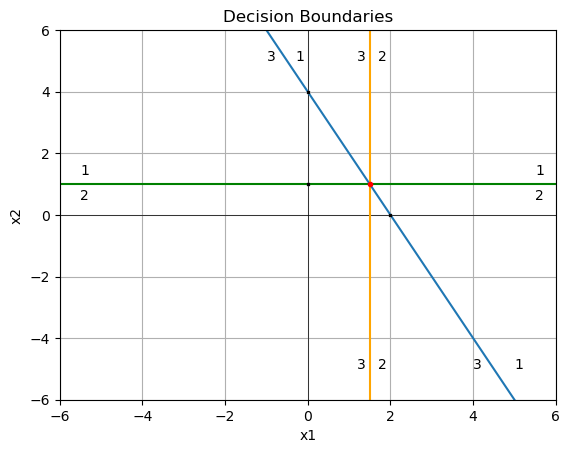

In [209]:
import matplotlib.pyplot as plt
import numpy as np

def plot_boundaries():
    x1 = np.linspace(-6, 6, 100)
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    ax.hlines(1, -6, 6, colors='green') # b12
    ax.vlines(1.5, -6, 6, colors='orange') # b23
    ax.plot(x1, 4 - 2 * x1) # b13

    ax.plot(1.5, 1, color='red', marker='o', markersize=3)
    ax.plot(1.5, 0, color='black', marker='', markersize=2)
    ax.plot(2, 0, color='black', marker='x', markersize=2)
    ax.plot(0, 4, color='black', marker='x', markersize=2)
    ax.plot(0, 1, color='black', marker='x', markersize=2)

    # b12
    ax.text(-5.5, 1.3, '1')
    ax.text(-5.5, 0.5, '2')
    ax.text(5.5, 1.3, '1')
    ax.text(5.5, 0.5, '2')
    
    # b13
    ax.text(-0.3, 5, '1')
    ax.text(5, -5, '1')
    ax.text(-1, 5, '3')
    ax.text(4, -5, '3')
    
    #b23
    ax.text(1.7, 5, '2')
    ax.text(1.2, 5, '3')
    ax.text(1.7, -5, '2')
    ax.text(1.2, -5, '3')

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    ax.set_title('Decision Boundaries')

    
plot_boundaries()

### Problem 1.4 (Exam Style)

#### Answer

At $(0, 0)$ we have the ranking: $s_3 > s_2 > s_1$

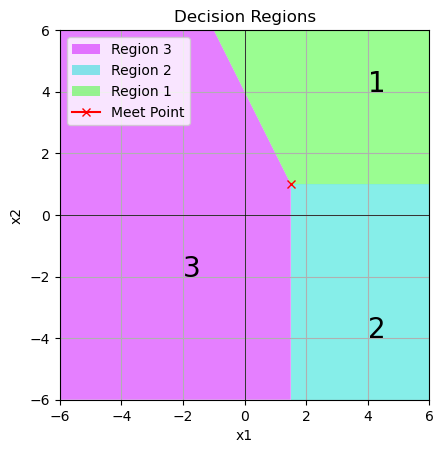

In [210]:
def plot_regions():
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    
    ax.set_aspect('equal')
    
    # 3 is max
    ax.fill([1.5, -6, -6, -1, 1.5], 
            [-6, -6, 6, 6, 1], 
            "#CC00FF", alpha=0.5, label='Region 3')

    # 2 is max
    ax.fill([1.5, 1.5, 6, 6], 
            [1, -6, -6, 1], 
            "#0fdfd5", alpha=0.5, label='Region 2')

    # 1 is max
    ax.fill([1.5, -1, 6, 6], 
            [1, 6, 6, 1], 
            "#37fd25", alpha=0.5, label='Region 1')

    ax.plot(1.5, 1, color='red', marker='x', label='Meet Point')
    ax.text(-2, -2, '3', color='black', fontsize=20)
    ax.text(4, 4, '1', color='black', fontsize=20)
    ax.text(4, -4, '2', color='black', fontsize=20)

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Decision Regions')
    ax.legend()

plot_regions()

## Part 2: Loss Functions

### Problem 2.1 (Exam Style)

#### Answer

We want to prove that
$$a'_j({\bf x}) = a_j({\bf x}) + \phi({\bf x}) \quad \text{for all } j = 1,...,K \quad \Rightarrow \quad \sigma(a'_k) = \sigma(a_k) \quad \text{for all } k = 1,..., K$$
We define the softmax function as $\sigma(y, \bf{a}) = \frac{e^{a_y}}{\sum_{j=1}^K e^{a_j}}$

Proof
$$
\begin{align}
    \sigma(a'_k)\quad \text{written out is } \sigma((a_j({\bf x}) + \phi({\bf x}))) & \\
    \sigma((a_j({\bf x}) + \phi({\bf x}))) &= \frac{e^{(a_k({\bf x}) + \phi({\bf x}))}}{\sum_{j=1}^K e^{(a_j({\bf x}) + \phi({\bf x}))}} \\
    &= \frac{e^{a_k({\bf x})} \cdot e^{\phi{\bf x}}}{\sum_{j=1}^K e^{a_j({\bf x})} \cdot  e^{\phi{\bf x}}} \\
    &= \frac{e^{\phi{\bf x}}}{e^{\phi{\bf x}}} \frac{e^{a_k({\bf x})}}{\sum_{j=1}^K e^{a_j({\bf x})}} \\
    &= \frac{e^{a_k({\bf x})}}{\sum_{j=1}^K e^{a_j({\bf x})}} \\
    &= \sigma(a_j({\bf x}))
\end{align}
$$

### Problem 2.2 (Exam Style)

#### Answer 

$$
\begin{align}
    a_1 &= 2 + 3x \\
    a_2 &= -2 - 3x
\end{align}
$$
Activation boundary $x_0$
$$
\begin{align}
    a_1 &= a_2 \\
    2 + 3x_0 &= -2 - 3x_0 \\
    6x_0 &= 4 \\
    x_0 &= -\frac{2}{3}
\end{align}
$$
The boundary divides the numberline into two intervals

We therefore have $h(\mathbf{x}) = 2 \quad \text{for all } x \in \left(-\infty,\,-\tfrac{2}{3}\right]$

And  $h(\mathbf{x}) = 1 \quad \text{for all } x \in \left(-\tfrac{2}{3},\,\infty\right)$

### Problem 2.3 (Exam Style)

#### Asnwer

$$ 
\begin{align}
l_2^{(1)}(y, \bf{x}) &= (a_1(\bf{x}) - t(y, k))^2 \\
\text{Since we know that }\quad a_1(x) &= a_2(x) \\
l_2^{(1)}(y, \bf{x}) &= (a_2(\bf{x}) - t(y, k))^2 \\
&= l_2^{(2)}(y, {\bf x})
\end{align}
$$

### Problem 2.4 (Exam Style)

In [211]:
def a_1(x):
    return 2 + 3*x

def a_2(x):
    return -2 - 3*x

def h(x):
    if a_1(x) > a_2(x):
        return 1
    else:
        return 2

def l_0_1(y, x):
    return 0 if h(x) == y else 1

def t(y, k):
    return 1 if y == k else -1

def l_2(y, x, k=1):
    if k == 1:
        return (a_1(x) - t(y, 1))**2
    else:
        return (a_2(x) - t(y, 2))**2

def beta(a):
    if a < 1:
        return 1 - a
    else:
        return 0

def l_h(y, x):
    if y == 1:
        return beta(a_1(x))
    else:
        return beta(a_2(x))
    
def l_s(y, x):
    if y == 1:
        return np.log(np.sum(np.exp([a_1(x), a_2(x)]))) - a_1(x)
    else:
        return np.log(np.sum(np.exp([a_1(x), a_2(x)]))) - a_2(x)

In [212]:
# print(
# a_1(1/3),'\n',
# a_2(1/3),'\n',
# h(1/3),'\n',
# np.log(np.exp(a_1(1/3)) + np.exp(a_2(1/3))),'\n',
# l_0_1(1, 1/3),'\n',
# l_0_1(2, 1/3),'\n',
# l_2(1, 1/3, 1),'\n',
# l_2(2, 1/3, 1),'\n',
# l_h(1, 1/3),'\n',
# l_h(2, 1/3),'\n',
# l_s(1, 1/3),'\n',
# l_s(2, 1/3)
# )


$$
\begin{aligned}
a_1(1/3) &= 3 \\
a_2(1/3) &= -3 \\
h(1/3) &= 1  \\
\log\left(e^{a_1(1/3)} + e^{a_2(1/3)}\right) &\approx 3.002476 \\
\ell_{\text{0-1}}(1, 1/3) &= 0 \\
\ell_{\text{0-1}}(2, 1/3) &= 1 \\
\ell_2^{(1)}(1, 1/3) &= 4 \\
\ell_2^{(1)}(2, 1/3) &= 16 \\
\ell_h(1, 1/3) &=  0 \\
\ell_h(2, 1/3) &=  4 \\
\ell_s(1, 1/3) &\approx 0.002476 \\
\ell_s(2, 1/3) &\approx 6.002476
\end{aligned}
$$

### Problem 2.5

In [213]:
def plot_lfunctions(l, title=''):
    x = np.linspace(-2, 2, 200)
    y1 = [l(1, xi) for xi in x]
    y2 = [l(2, xi) for xi in x]

    fig, ax = plt.subplots()
    ax.plot(x, y1, label='y=1', color='blue')
    ax.plot(x, y2, label='y=2', color='orange')
    
    x0 = -2/3
    ax.axvline(x0, lw=0.5, color='k')
    
    ax.set_xlim(-2, 2)
    ax.set_xlabel('x')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

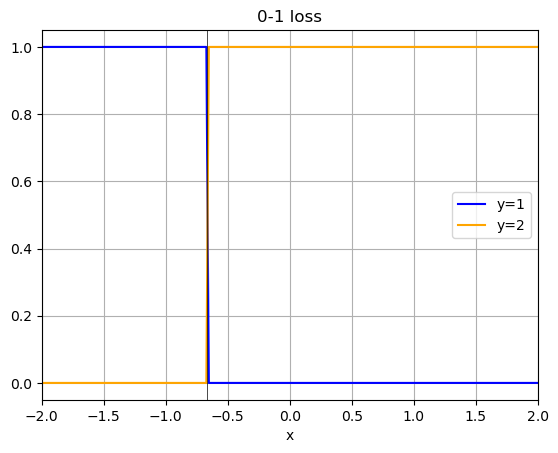

In [214]:
plot_lfunctions(l_0_1, title='0-1 loss')

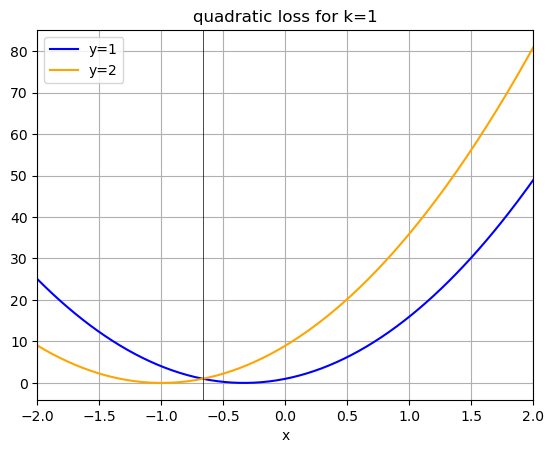

In [215]:
plot_lfunctions(l_2, title='quadratic loss for k=1')

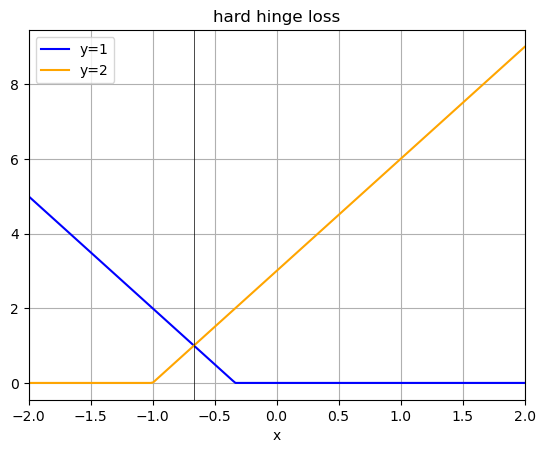

In [216]:
plot_lfunctions(l_h, title='hard hinge loss')

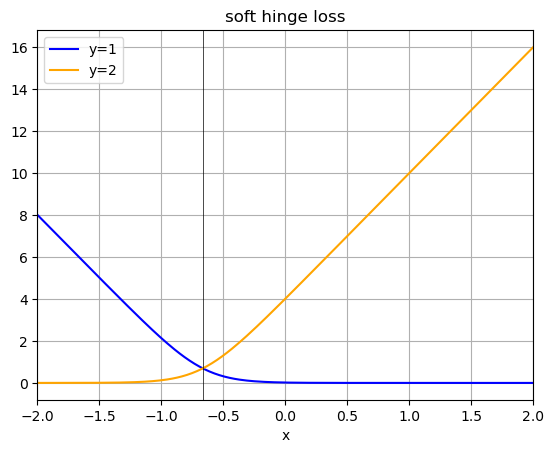

In [217]:
plot_lfunctions(l_s, title='soft hinge loss')

## Part 3: Working with Soft-Max Classifiers 

### Problem 3.1

In [218]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [219]:
def retrieve(file_name, semester='fall25', homework=4):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [220]:
clouds, filenames = [], ['ternary.pkl', 'aligned.pkl', 'outliers.pkl']
for filename in filenames:
    retrieve(filename)
    with open(filename, 'rb') as file:
        clouds.append(pickle.load(file))
ternary, aligned, outliers = clouds[0], clouds[1], clouds[2]

Using previously downloaded file ternary.pkl
Using previously downloaded file aligned.pkl
Using previously downloaded file outliers.pkl


In [221]:
import sklearn.linear_model as lm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [ ]:
data_file_name = 'mnist_hard.pkl'
retrieve(data_file_name)
with open(data_file_name, 'rb') as file:
    mnist = pickle.load(file)


In [ ]:

# modified from hw1
def decision_regions(h, box, g):
    x = np.linspace(box[0], box[1], g)
    y = np.linspace(box[2], box[3], g)
    X, Y = np.meshgrid(x, y)

    points = np.c_[X.ravel(), Y.ravel()]
    labels = h.predict(points)

    return np.reshape(labels, (g,g))

def show_region_boundary(r, box, ax=None, labels=None, color_labels=None):
    values = np.unique(r)
    if not labels:
        labels = values
    ell = len(labels)

    ax.contour(
        r, aspect=None, origin='lower', extent=box,
        vmin=min(values), vmax=max(values), 
        cmap=mcolors.ListedColormap(color_labels)
    )

    handles = [mpatches.Patch(color=color_labels[j], label=labels[j]) for j in range(ell)]
    ax.legend(handles=handles)

def draw_decision_boundary(k, data, ax=None, g=300):
    x = data.x
    y = data.y
    h = lm.LogisticRegression()
    h.fit(x, y)
    
    box = [x[:,0].min()-2, x[:,0].max()+2, x[:,1].min()-2, x[:,1].max()+2]
    r = decision_regions(h, box, g)
    show_region_boundary(r, box, ax=ax, color_labels=data.label_colors)
    plt.show()
    
def plot_scatter(data, k=3):
    fig, ax = plt.subplots()

    unique_labels = np.unique(data.y)
    for label in unique_labels:
        indices = np.where(data.y == label)
        ax.scatter(data.x[indices, 0], data.x[indices, 1], label=f'Class {label+1}', c=data.label_colors[label])

    draw_decision_boundary(k, data, ax, g=1000)
    



Using previously downloaded file mnist_hard.pkl


/var/folders/zm/n9n7vln17j99v5vn8lng8yhh0000gn/T/ipykernel_1750/941497421.py:23: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax.contour(


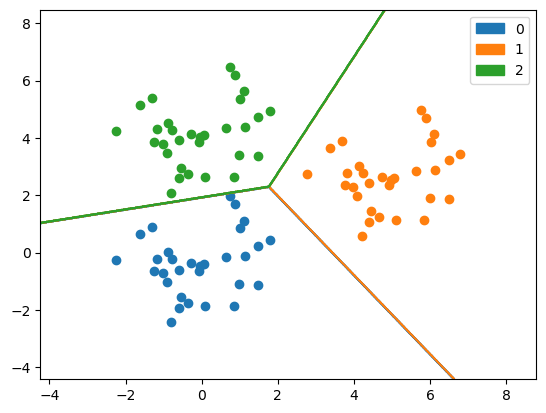

In [223]:
plot_scatter(ternary)

/var/folders/zm/n9n7vln17j99v5vn8lng8yhh0000gn/T/ipykernel_1750/941497421.py:23: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax.contour(


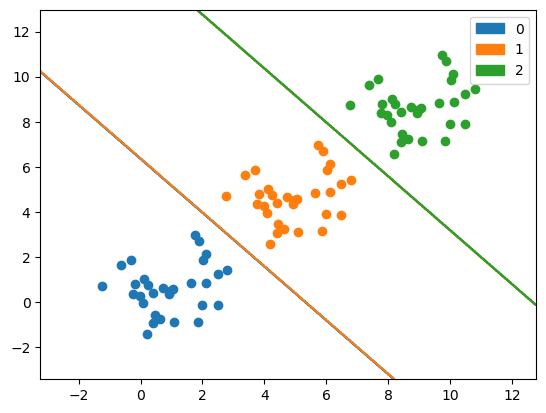

In [224]:
plot_scatter(aligned)

/var/folders/zm/n9n7vln17j99v5vn8lng8yhh0000gn/T/ipykernel_1750/941497421.py:23: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax.contour(


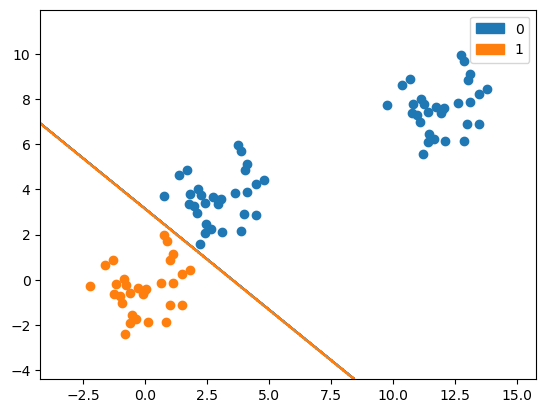

In [225]:
plot_scatter(outliers, k=2)

## Part 4: Linear Classification of Handwritten Digits 

### Problem 4.1

In [231]:
import sklearn.metrics

def evaluate(data):
    train = data['train']
    test = data['test']
    train_x = train['x']
    train_y = train['y']
    test_x = test['x']
    test_y = test['y']
    h = lm.LogisticRegression(max_iter=1000)
    h.fit(train_x, train_y)
    training_accuracy = sklearn.metrics.accuracy_score(train_y, h.predict(train_x))
    testing_accuracy = sklearn.metrics.accuracy_score(test_y, h.predict(test_x))
    print(f'Training accuracy: {round(training_accuracy, 3)}')
    print(f'Testing accuracy: {round(testing_accuracy, 3)}')
    
evaluate(mnist)

Training accuracy: 1.0
Testing accuracy: 0.86


### Problem 4.2 (Exam Style)

#### Answer

> 1. What does the training accuracy you obtained in Problem 4.1 tell you about the training set you used there? No explanation needed.

The training accuray is 1.0 which implies that our model predicts every training point perfectly. It classifies them all correctly

> 2. Does the algorithm generalize well? Justify your answer briefly.

The algorithm has a testing accuracy of 0.86 which means it loses 14% accuracy compared to the training data. This is still arguably a reasonably well performance

####

### Problem 4.3 (Exam Style)

1. $d = $
2. $N = $
3. $K = $
4. $m = $
5. $b = $
6. $d_{GD} = $
7. $s_{GD} = $
8. $d_{SGD} = $
9. $s_{SGD} = $